<a href="https://colab.research.google.com/github/ldm2060/LearningNote/blob/main/DL%202023.6/week5/%E8%A7%86%E9%A2%91%E7%AC%94%E8%AE%B0/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 5 生成式对抗网络 Generative Adversarial Network (GAN)

## 5.1 概念

Network as Generator
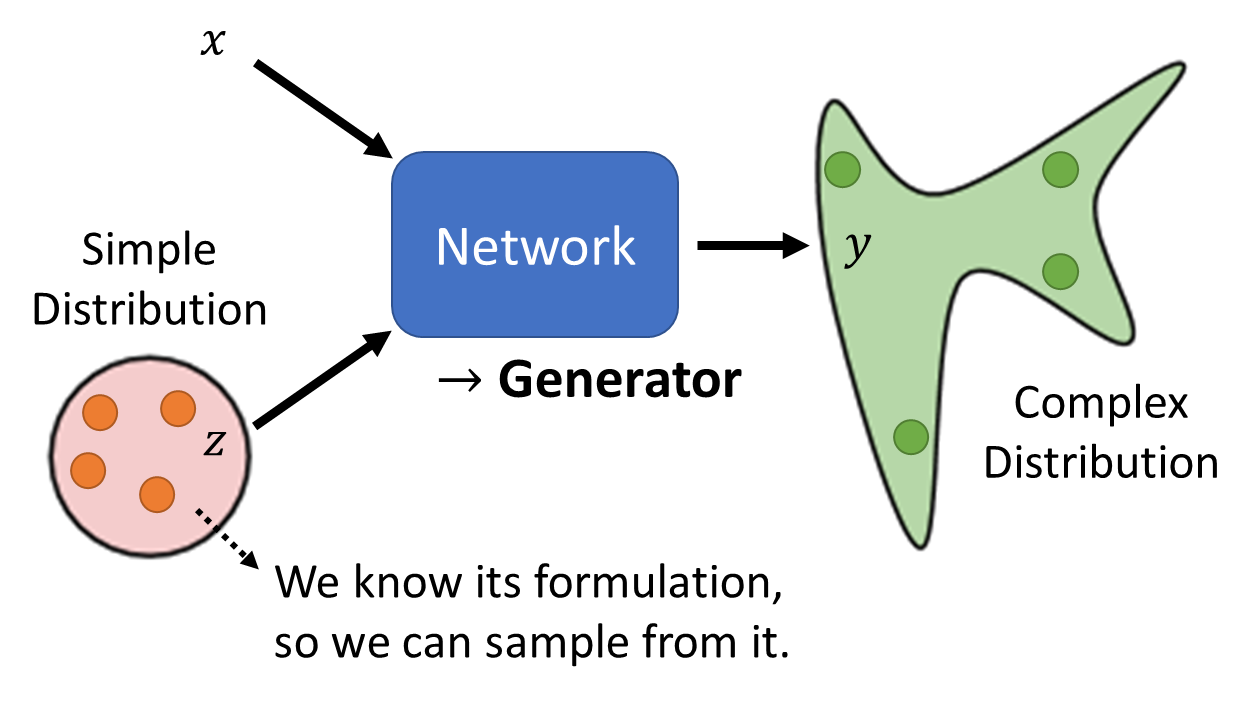

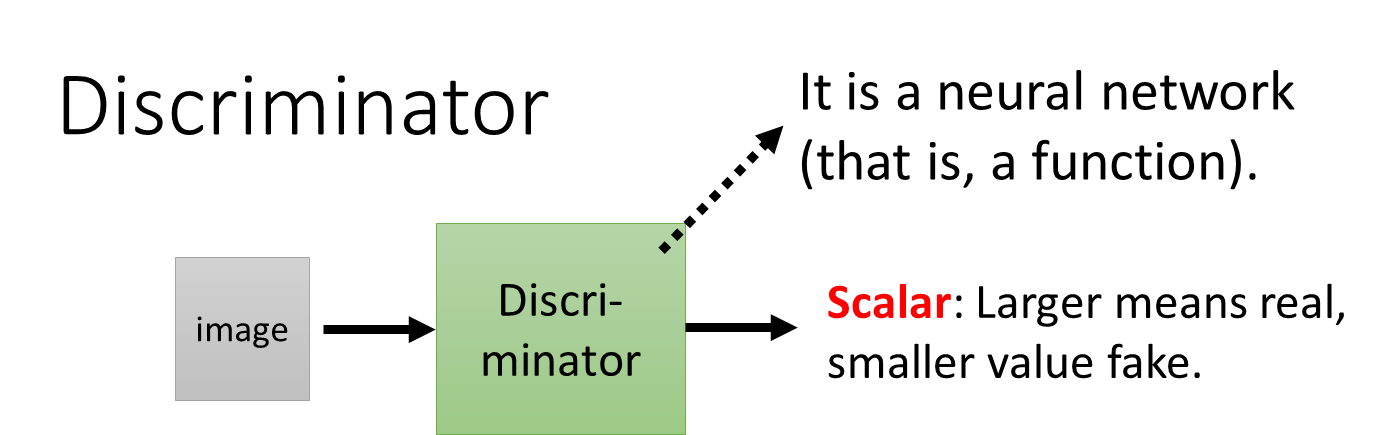

所谓对抗

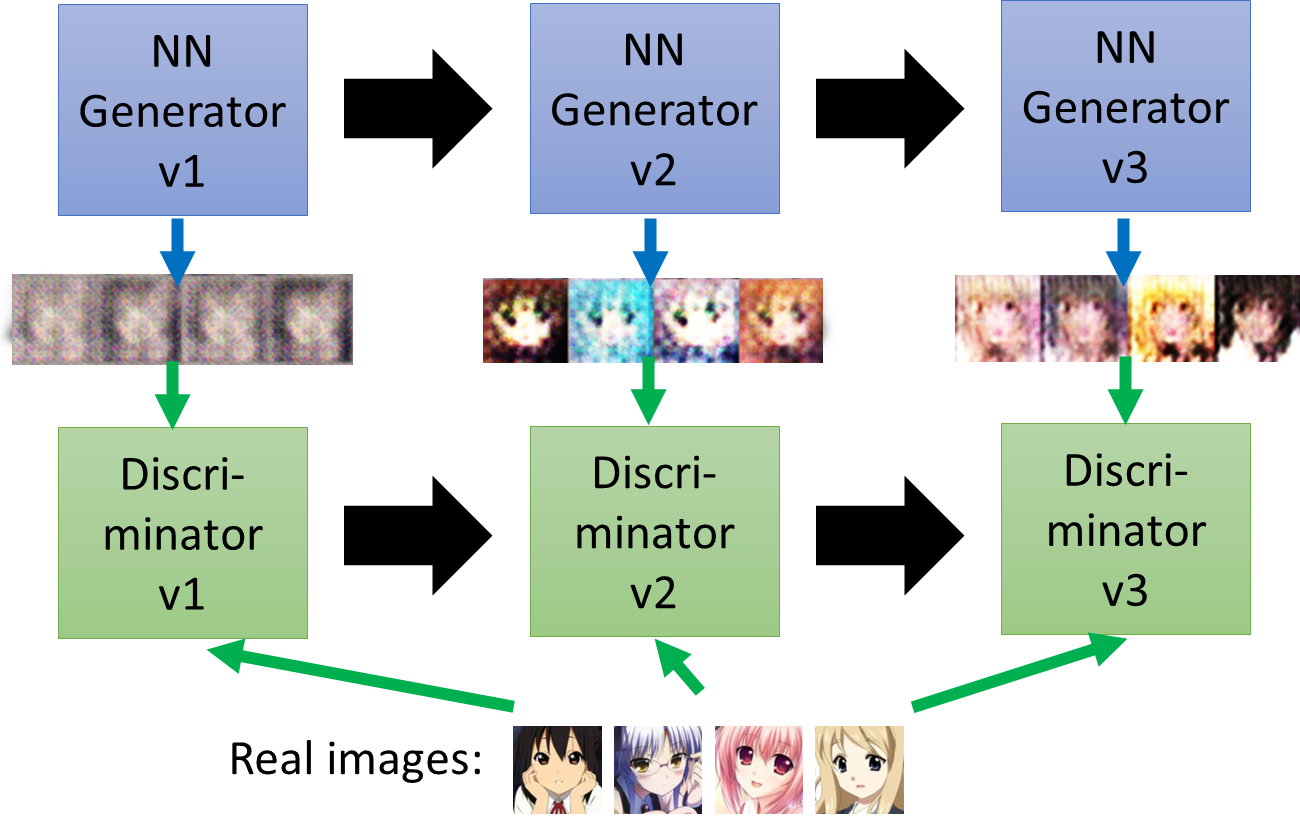

generator： 希望生成的图片能骗过Discriminator

Discriminator：希望找出generator生成的图片

**Algorithm**
- Initialize generator and discriminator
- In each training iteration:

Step 1: Fix（固定） generator G, and update discriminator D
- Discriminator learns to assign high scores to real objects and low scores to generated objects.

Step 2: Fix discriminator D, and update generator G
- Generator learns to “fool” the discriminator



## 5.2 理论

目标

$G^*=arg\min_GDiv(P_G,P_{data})$

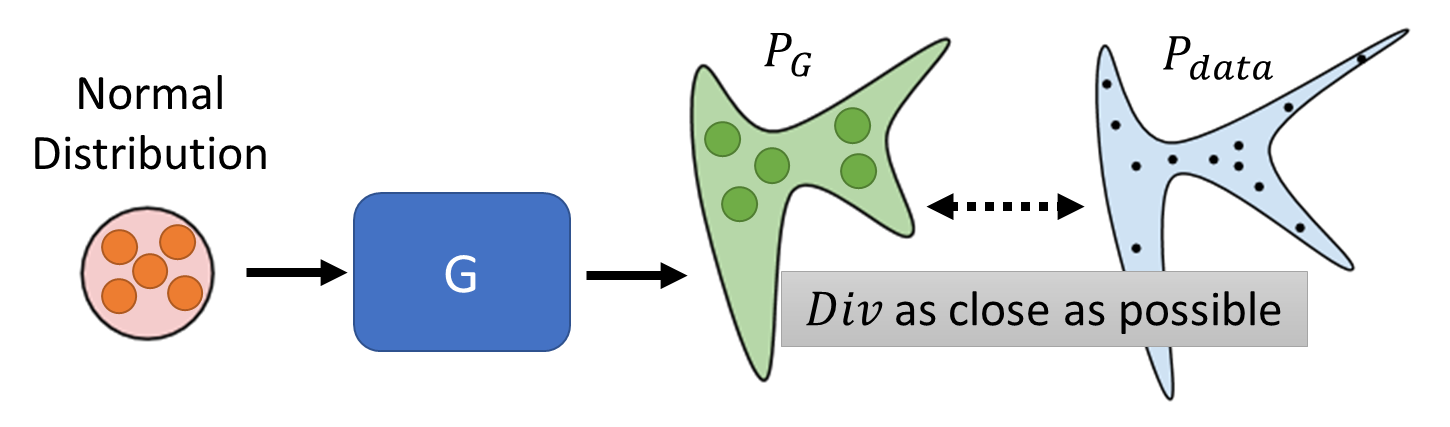

$Div$：通过 Discriminator

Training: $D* = arg max_DV(D,G)$ ：The Value is related to JS divergence.

Objective Function for $D￥

$V(C,D) = E_{y \thicksim P_{data}}[logD(y)]+ E_{y \thicksim P_G}[log(1 - D(y))]$

$D*=arg max_D V(D)$    = Training classifier

negative cross entropy = minimize cross entropy



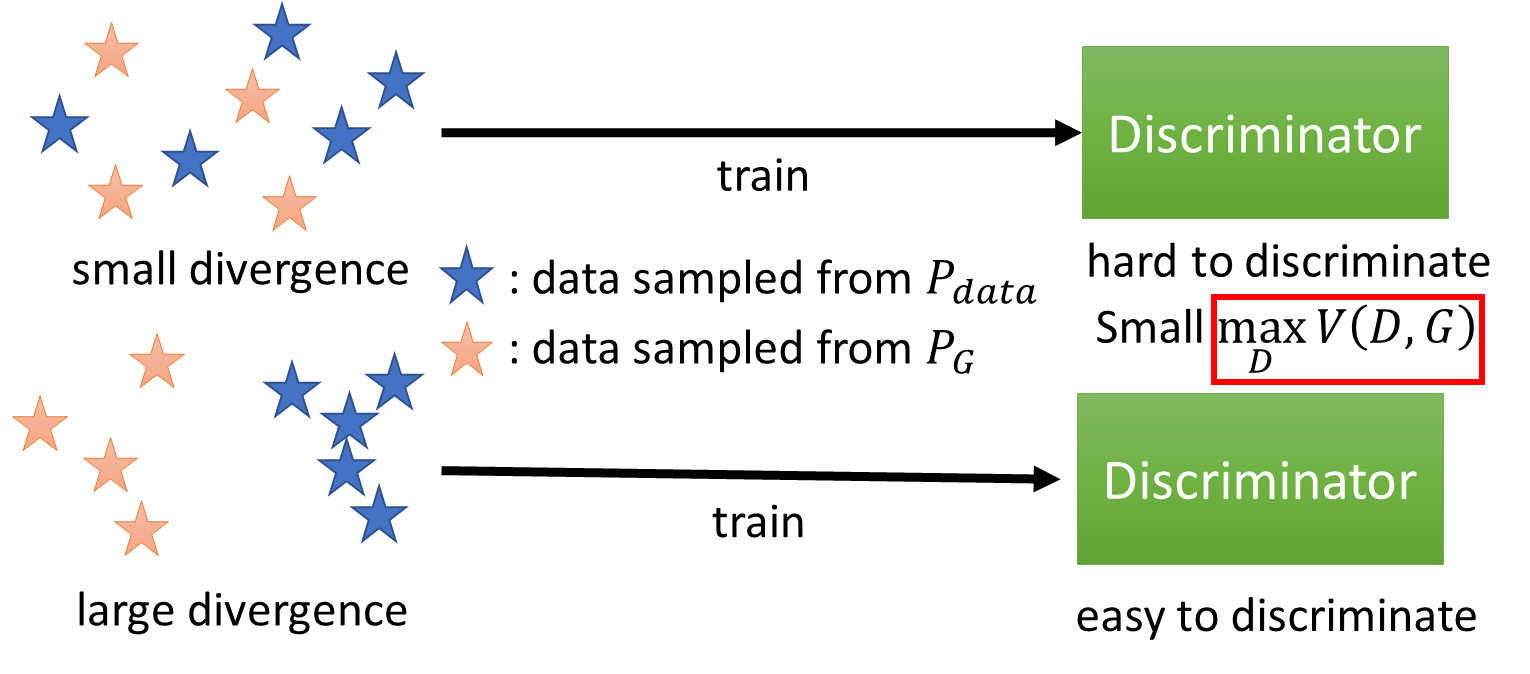

$G^*=arg\min_G\max_DV(G,D)$

$D^*=arg\max_DV(D,G)$：The maximum objective value is related to JS divergence

- Initialize generator and discriminator
- In each training iteration:
  - *Step 1* ：Fix generator $G$, and update discriminator $D$
  - *Step 2* ：Fix discriminator $D$, and update generator $G$


**JS divergence is not suitable**

- In most cases, $P_G$ and $P_{data}$ are not overlapped.
- 1. The nature of data  
Both $P_{data}$ and $P_G$ are low-dim manifold in high-dim space.   
The overlap can be ignored.
- 2. Sampling  
Even though $P_{data}$ and $P_G$ have overlap, If you do not have enough sampling ……

**JS divergence is always log2 if two distributions do not overlap.**

  Intuition: If two distributions do not overlap, binary classifier achieves 100% accuracy.

  The accuracy (or loss) means nothing during GAN training.

WGAN

\begin{aligned}&\textsf{Evaluate Wasserstein distance between }P_{data}\mathrm{~and~}P_G\\&\max_{D\in1-Lipschitz}\{E_{\mathcal{Y}\sim P_{data}}[D(y)]-E_{\mathcal{Y}\sim P_G}[D(y)]\}\\&\color{red}{\text{D has to be smooth enough. How to fulfill this constraint?}}\end{aligned}

Without the constraint, the training of D will not converge.

Keeping the D smooth forces D(y) become ∞ and −∞
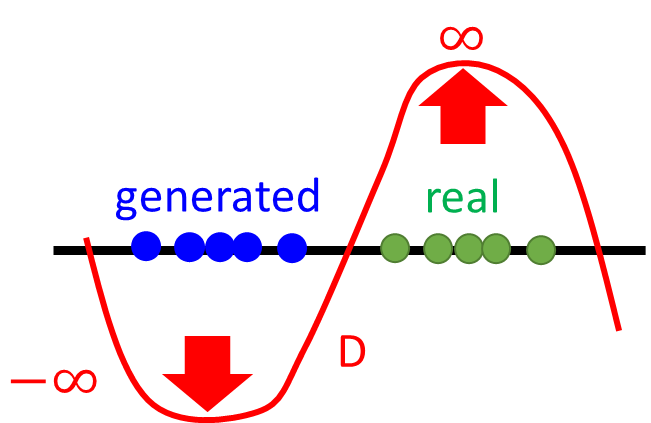

1. Original WGAN → Weight
- Force the parameters w between c and -c
- After parameter update, if w > c, w = c; if w < -c, w = -c

2. Improved WGAN → Gradient Penalty
- https://arxiv.org/abs/1704.00028
- 生成点和真实点各取一个，两点连线取一点，并Keep the gradient close to 1

3. Spectral Normalization → Keep gradient norm smaller than 1 everywhere
- https://arxiv.org/abs/1802.05957


## 5.3 生成器效能评估与条件式生成

Generator and Discriminator needs to match each other (棋逢敌手，一方不进步另外一方也会停下来)
- Tips from Soumith
  - https://github.com/soumith/ganhacks
- Tips in DCGAN: Guideline for network architecture design for image generation
  - https://arxiv.org/abs/1511.06434
-Improved techniques for training GANs
  - https://arxiv.org/abs/1606.03498
-Tips from BigGAN
  - https://arxiv.org/abs/1809.11096

How to evaluate the quality of the generated images automatically?
- 使用其他模型（如图片分类）来检验生成的效果






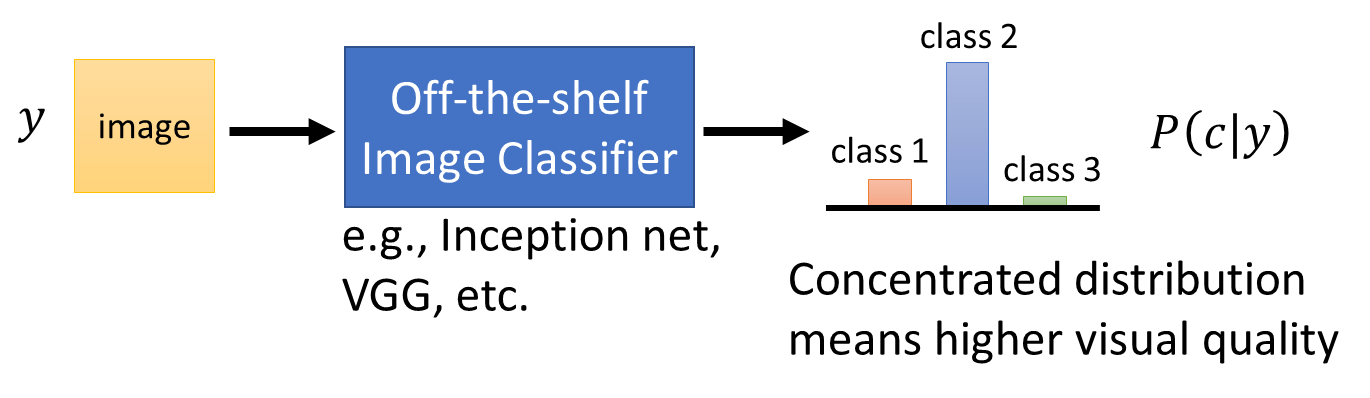

问题

Mode Collapse：模型总是生成某种特定特征的结果，因为该种特征可以骗过discriminator

Mode Dropping：模型生成的结果是真实结果分布的一部分，多样性不够

尝试用其他模型检测

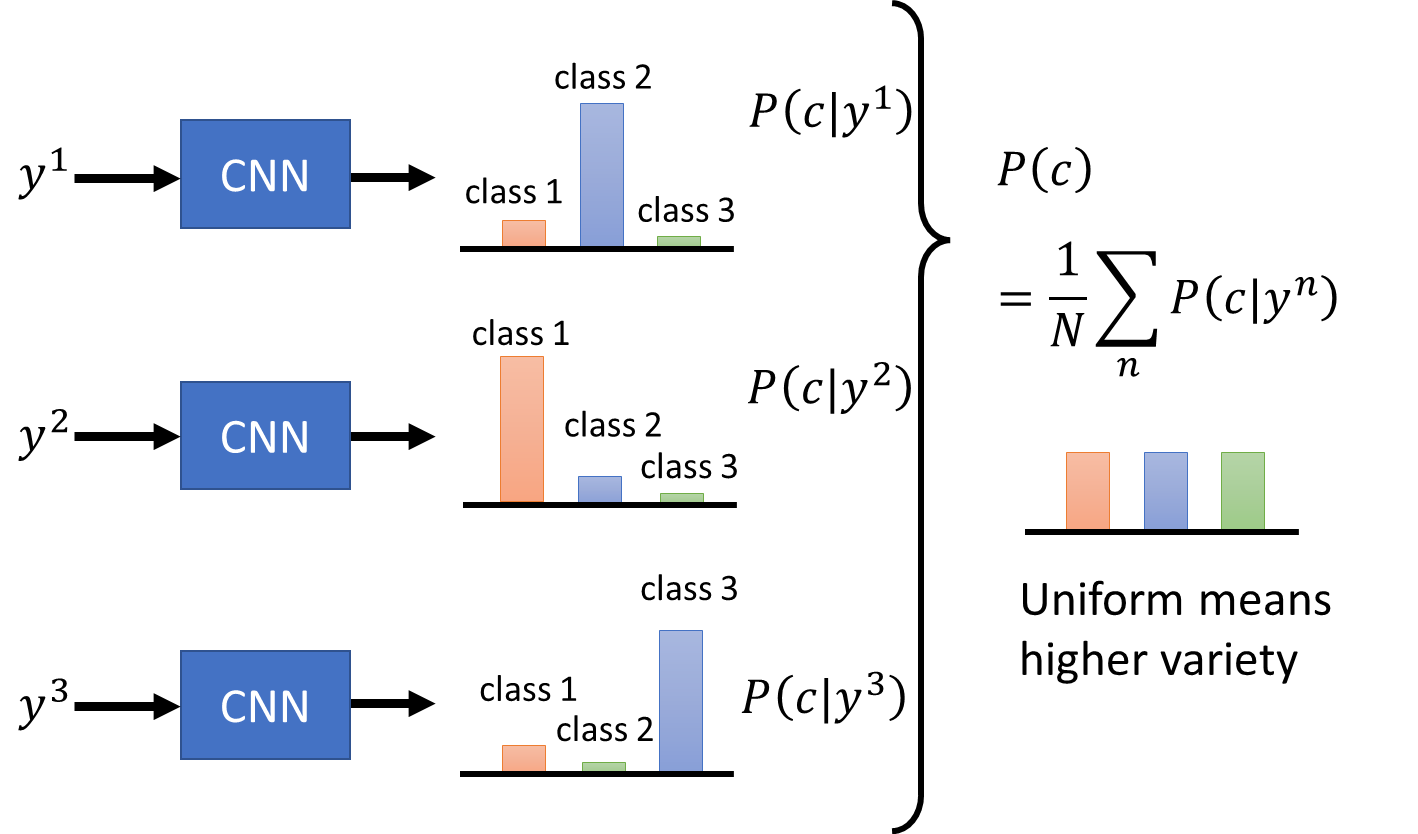

Fréchet Inception Distance (FID)

- red points: real image vectors
- blue points: generated image vectors
- FID = Fréchet distance between the two Gaussians，Smaller is better




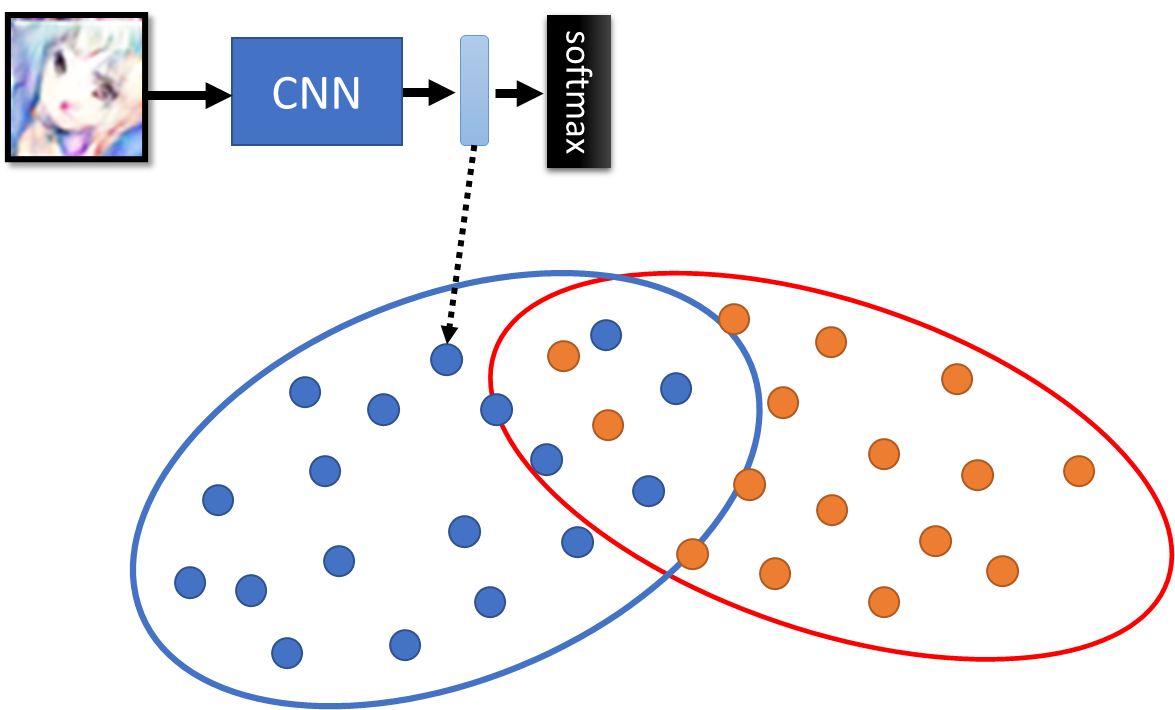

**Conditional Generation**

Generator：额外增加条件的输入

Discriminator：额外告诉它生成图片与条件不相符的情况

一些任务：如图片->图片，考虑引入监督学习，让模型能够按要求生成图片的同时生成的图片比较接近理想的结果

## 5.5 Cycle GAN

Learning from Unpaired Data

两个generator，一个由输入生成结果（x->y），一个由结果还原输入(y->x)，希望两个输入越接近越好

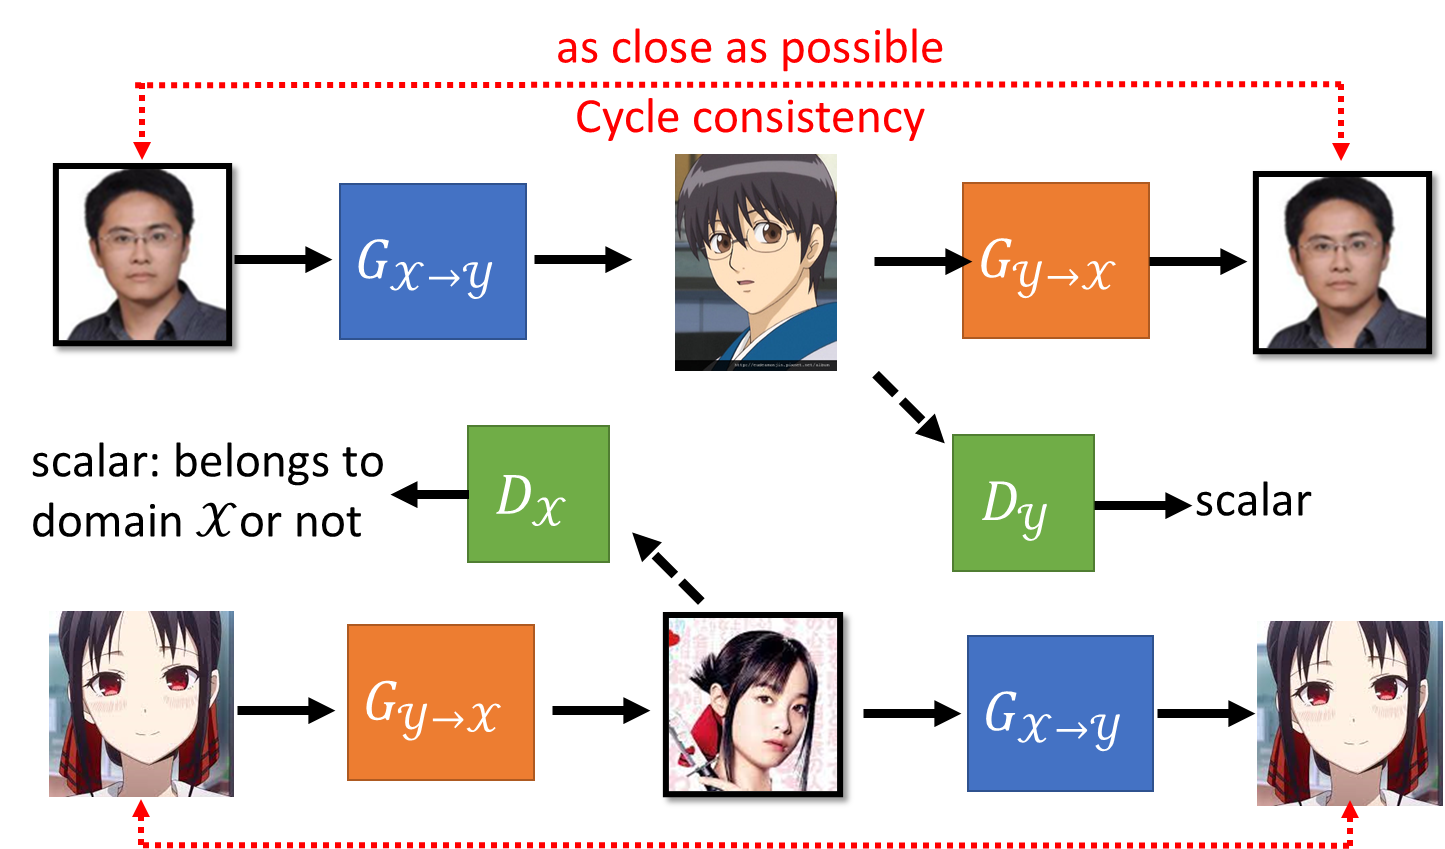